In [1]:
import ExpControl
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['font.size'] = 22.0
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.labelsize'] = 26
plt.style.use('seaborn-white')

In [3]:
meas = ExpControl.Measurements(instr=['vna'])

C:\Users\Public\Anaconda\lib\site-packages\qcodes\instrument\parameter.py:274: UserWarning: Wrapping get method of parameter: trace, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead. Overwriting get will be an error in the future.
  warnings.warn(f'Wrapping get method of parameter: {self.full_name},'


Connected to: Agilent Technologies E5071C (serial:MY46526831, firmware:B.13.20) in 0.49s


In [93]:
meas.setup_vna(power=-30,avgs = 1,measure = 'S21')

### Double Sided Bragg with Old Widths and Gaps

Trace took 0:00:20.505173


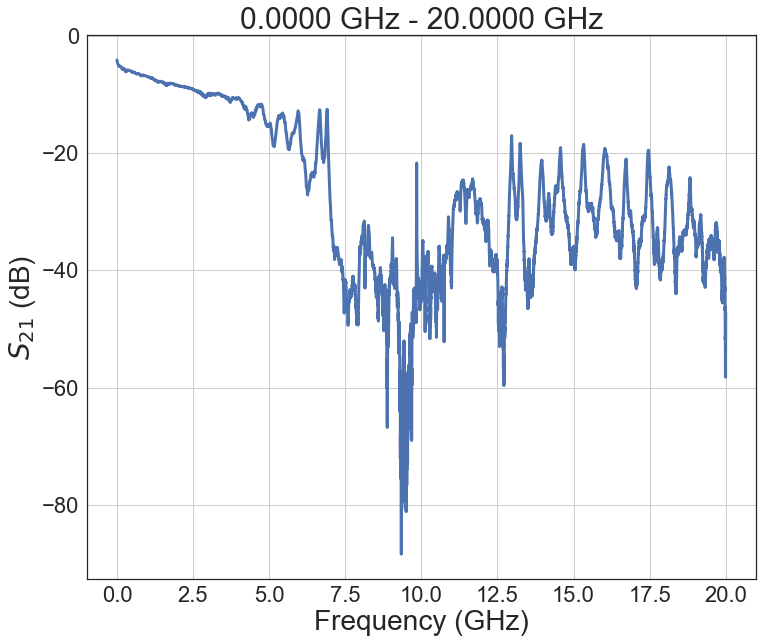

In [94]:
trace_wb = meas.trace(0e09,20.0e09,npts=20001,bandwidth=1000)

Trace took 0:00:05.239299


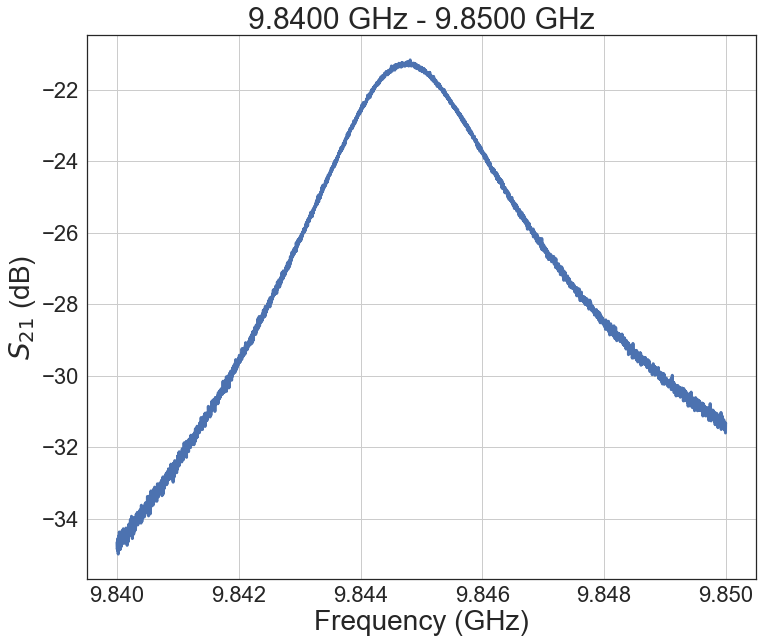

In [95]:
trace_nb = meas.trace(9.84e09,9.85e09,npts=5001,bandwidth=1000)

In [96]:
da = ExpControl.DataAnalysis()
fit = da.LorentzianFit(trace_nb[0],trace_nb[1][0],plot=True) 

<Parameter 'amplitude', value=-0.0073845072681305995 +/- 1.45e-06, bounds=[-inf:inf]> <Parameter 'q', value=-0.07122905608271753 +/- 0.000345, bounds=[-inf:inf]> <Parameter 'sigma', value=2.6423619371338716 +/- 0.00108, bounds=[0.0:inf]>


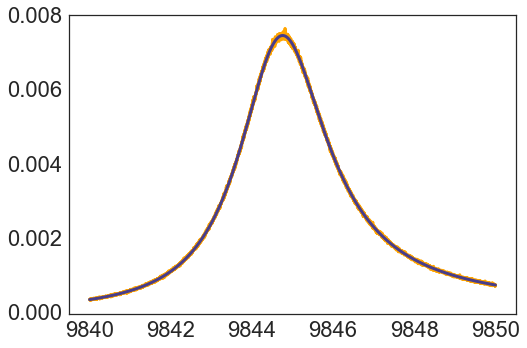

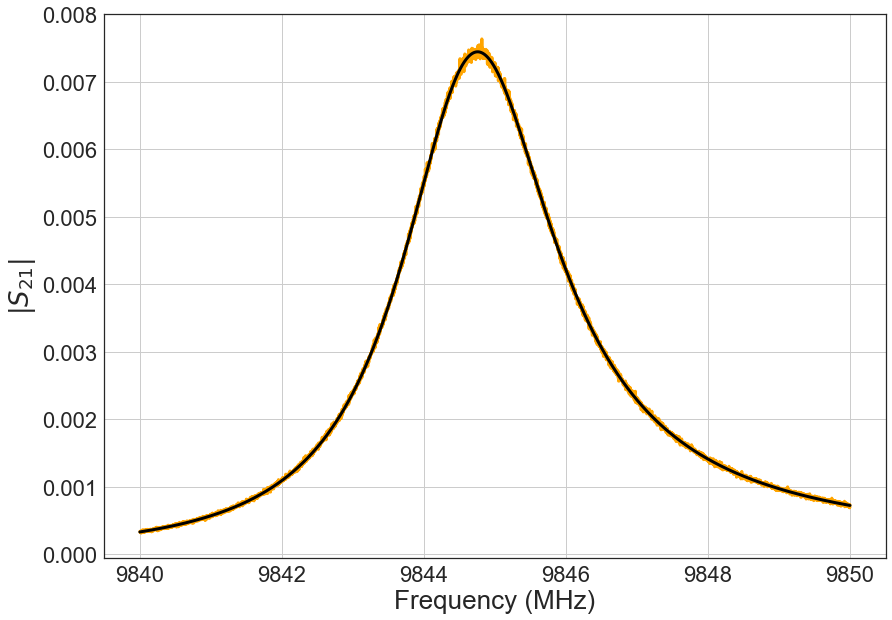

In [97]:
plt.figure(figsize=(14,10))
plt.plot(fit.x,fit.y,alpha=1,color='orange')
plt.plot(fit.x,fit.fit,'-',color='k')
plt.xlabel('Frequency (MHz)')
plt.ylabel('$\\left|S_{21}\\right|$')
plt.grid()
plt.show()

In [98]:
print(fit.centre.values[0])
print(fit.Q.values[0])

9844.66283059
3725.70566213


In [99]:
df_wb = pd.DataFrame(data = {'freq':trace_wb[0],'ch1':trace_wb[1][0],'ch2':trace_wb[1][1]})
df_nb = pd.DataFrame(data = {'freq':trace_nb[0],'ch1':trace_nb[1][0],'ch2':trace_nb[1][1]})
df_fit = pd.DataFrame(data = {'x':fit.x, 'y':fit.y, 'fit':fit.fit, 
                'sigma':fit.sigma, 'centre':fit.centre, 'Q':fit.Q})

In [100]:
df_wb.to_pickle("data/XBand_Braggs/DBL_Old/+10dB_wb.pkl")
df_nb.to_pickle("data/XBand_Braggs/DBL_Old/+10dB_nb.pkl")
df_fit.to_pickle("data/XBand_Braggs/DBL_Old/+10dB_fit.pkl")

### Double Sided Bragg - Zhigh = 100

In [143]:
meas.setup_vna(power=30,avgs = 1,measure = 'S21')

Trace took 0:00:20.299161


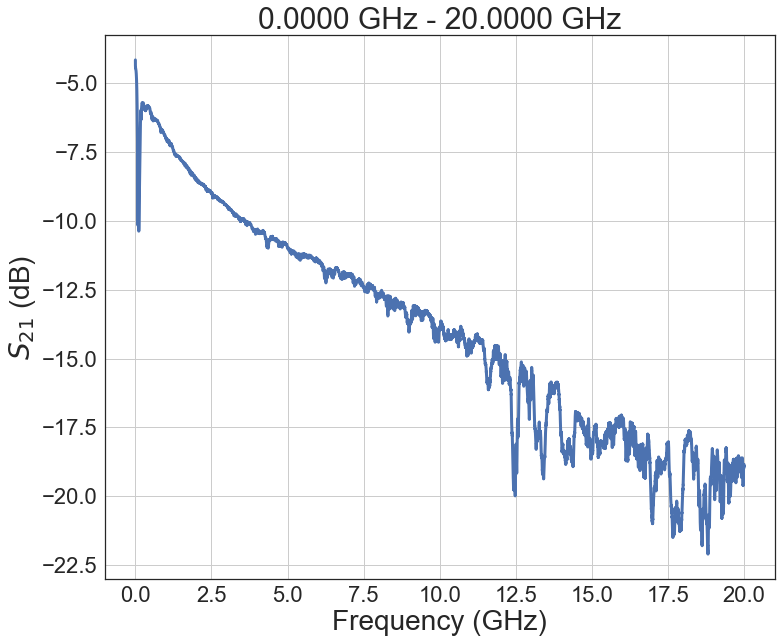

In [144]:
trace_wb = meas.trace(0e09,20.0e09,npts=20001,bandwidth=1000)

Trace took 0:00:05.416310


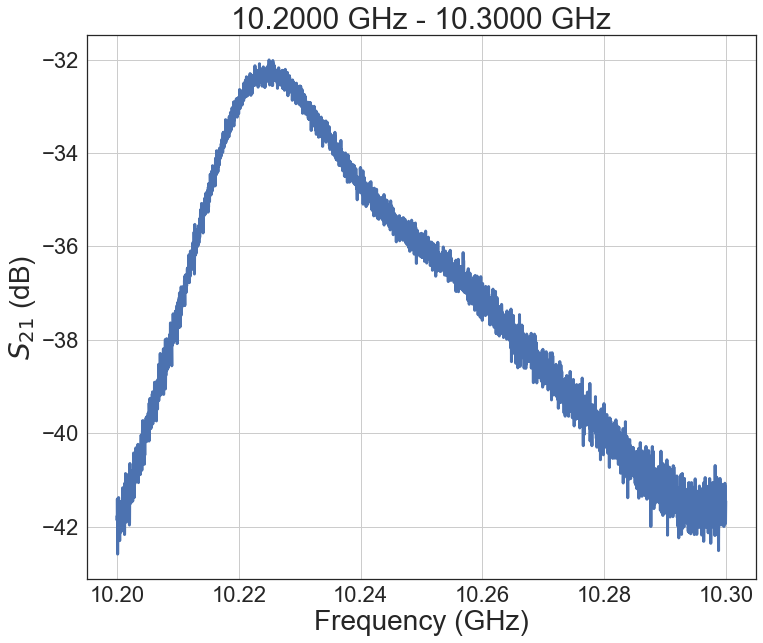

In [140]:
trace_nb = meas.trace(10.2e09,10.3e09,npts=5001,bandwidth=1000)

In [145]:
df_wb = pd.DataFrame(data = {'freq':trace_wb[0],'ch1':trace_wb[1][0],'ch2':trace_wb[1][1]})

In [142]:
df_wb.to_pickle("data/XBand_Braggs/DBL_100/+10dB_wb.pkl")

In [116]:
%%bash
ls data/XBand_Braggs/DBL_100

In [146]:
df_probe.to_pickle("data/XBand_Braggs/DBL_100/probe_wb.pkl")